# Practice IRIS data Classification Logistic Regression

In [30]:
# import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.tree import DecisionTreeClassifier
 
import warnings
warnings.filterwarnings('ignore')

In [31]:
# library load data
from sklearn.datasets import load_iris

In [32]:
data=load_iris()

In [91]:
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [34]:
data_x=pd.DataFrame(data=data.data,columns=data.feature_names)
print(data_x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [35]:
data_x.shape

(150, 4)

In [36]:
data_y=pd.DataFrame(data.target,columns=['class'])

In [37]:
data_y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [38]:
data_y.shape
print(data_y)

     class
0        0
1        0
2        0
3        0
4        0
..     ...
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]


In [39]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [40]:
data_x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


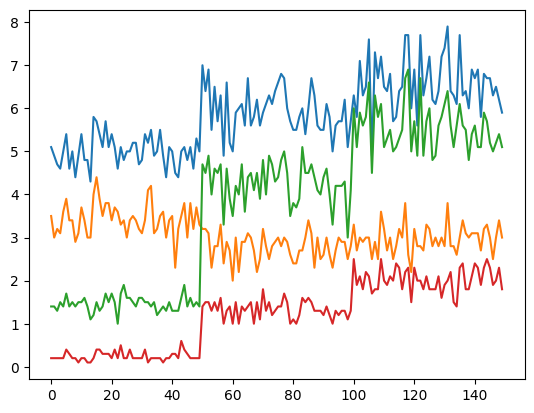

In [41]:
plt.plot(data_x)

In [42]:
# rename the column in x
#sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)

data_x.rename(columns={
        'sepal length (cm)':'sepal_length',
        'sepal width (cm)':'sepal_width',
        'petal length (cm)':'petal_length',
        'petal width (cm)':'petal_width'   
},inplace=True)

In [43]:
data_x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
# copy few columns of dataframe into another
df=pd.DataFrame()
df=data_x[['sepal_length','sepal_width']]

df1=pd.DataFrame()
df1=data_x[['petal_length','petal_width']]


In [45]:
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


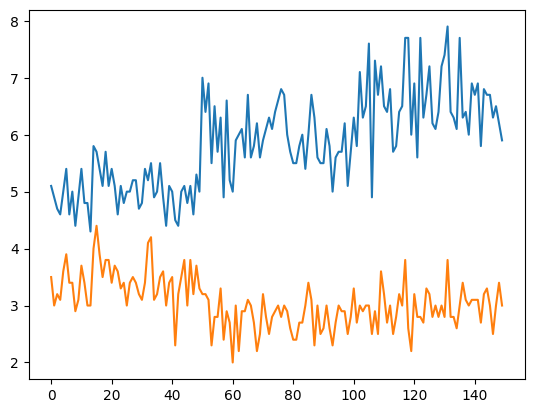

In [46]:
plt.plot(df)

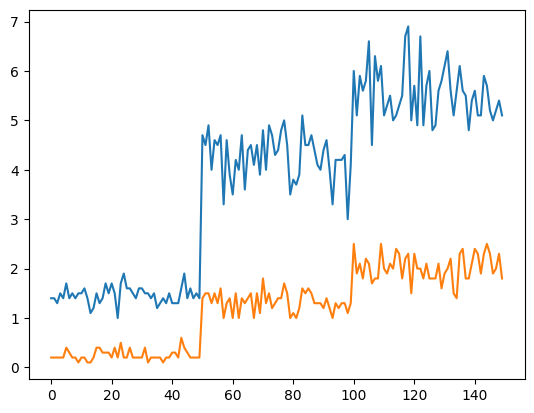

In [47]:
plt.plot(df1)

In [48]:
# to check coorelation
data_x.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [49]:
# to check null values
data_x.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [50]:
#split the data
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest,ytrain,ytest= train_test_split(data_x,data_y,test_size=0.2)

In [52]:
xtrain.shape,ytrain.shape

((120, 4), (120, 1))

In [53]:
xtest.shape,ytest.shape

((30, 4), (30, 1))

In [88]:
print(ytrain)

     class
35       0
37       0
115      2
12       0
39       0
..     ...
114      2
68       1
49       0
106      2
100      2

[120 rows x 1 columns]


In [89]:
print(ytest)

     class
60       1
29       0
144      2
133      2
117      2
85       1
149      2
76       1
64       1
19       0
5        0
143      2
9        0
75       1
103      2
22       0
91       1
52       1
44       0
119      2
48       0
73       1
17       0
70       1
43       0
45       0
47       0
15       0
11       0
50       1


In [57]:
# Prepare model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [58]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [59]:
lr.coef_

array([[-0.41681875,  0.80376885, -2.3396878 , -1.00203635],
       [ 0.43186503, -0.55294486, -0.10056537, -0.9931612 ],
       [-0.01504627, -0.25082399,  2.44025317,  1.99519755]])

In [60]:
pred=lr.predict(xtest)

In [61]:
pred=pd.DataFrame(pred)

In [62]:
pred.head()

,0
0,1
1,0
2,2
3,2
4,2


In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [64]:
ac=accuracy_score(ytest,pred)
print("Accuracy : ",ac)

Accuracy :  0.9333333333333333


In [65]:
lr.score(xtest,ytest)

0.9333333333333333

In [66]:
csr=classification_report(ytest,pred)
print("Classification Report : \n\n",csr)

Classification Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.90      0.90        10
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [67]:
mts=confusion_matrix(ytest,pred)
print("Confusion Matrix :\n ",mts)

Confusion Matrix :
  [[13  0  0]
 [ 0  9  1]
 [ 0  1  6]]


In [68]:
# import random Forest model --------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create gaussian classifier
clf=RandomForestClassifier(random_state=100)

# fitting the training data
clf.fit(xtrain,ytrain)

clf.score(xtest,ytest)

0.9

In [69]:
# Apply Decision Tree 
from sklearn import tree

dt_clf=tree.DecisionTreeClassifier(max_depth=5)

#fit the model
dt_clf.fit(xtrain,ytrain)

#make prediction
dt_clf.score(xtest,ytest)

0.9

In [70]:
# Apply GardientBootingClassifier

from sklearn import ensemble

gb_clf= ensemble.GradientBoostingClassifier()

gb_clf.fit(xtrain,ytrain)

# Claasification Report
#gb_clf_predict=classifier.predict(xtest)
#print(classification_report(ytest,gb_clf_predict))

gb_clf.score(xtest,ytest)

0.9

In [71]:
# Apply SVM model
from sklearn import svm
from sklearn.metrics import classification_report

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(xtrain,ytrain)
y_predict=classifier.predict(xtest)              
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.90      0.90        10
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [72]:
# Compariosion of models
print("Linear Regression Model Score is ",round(lr.score(xtest,ytest)*100))
print("Decision tree  Regression Model Score is ",round(dt_clf.score(xtest,ytest)*100))
print("Random Forest Regression Model Score is ",round(clf.score(xtest,ytest)*100))
print("Support Vector machine Model Score is ",round(classifier.score(xtest,ytest)*100))
print("GardientBoostingClassifier Model Score is ",round(gb_clf.score(xtest,ytest)*100))

Linear Regression Model Score is  93
Decision tree  Regression Model Score is  90
Random Forest Regression Model Score is  90
Support Vector machine Model Score is  93
GardientBoostingClassifier Model Score is  90


# Exploratory Data Analysis

In [73]:
# lopad data including Species column

iris_df = pd.read_csv("C:/Users/admin/Iris.csv")

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
#Remove 'id' column as it's not adding any significance in result
iris_df.drop(columns='Id', inplace=True)

In [75]:
#Rename columns
iris_df.rename({'SepalLengthCm' : 'SepalLength', 'SepalWidthCm' : 'SepalWidth', 'PetalLengthCm': 'PetalLength', 'PetalWidthCm' : 'PetalWidth'} , axis=1, inplace=True)

In [76]:
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
# Get the Each size of data for each class label
iris_df.groupby('Species').size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# 2D Pairplot

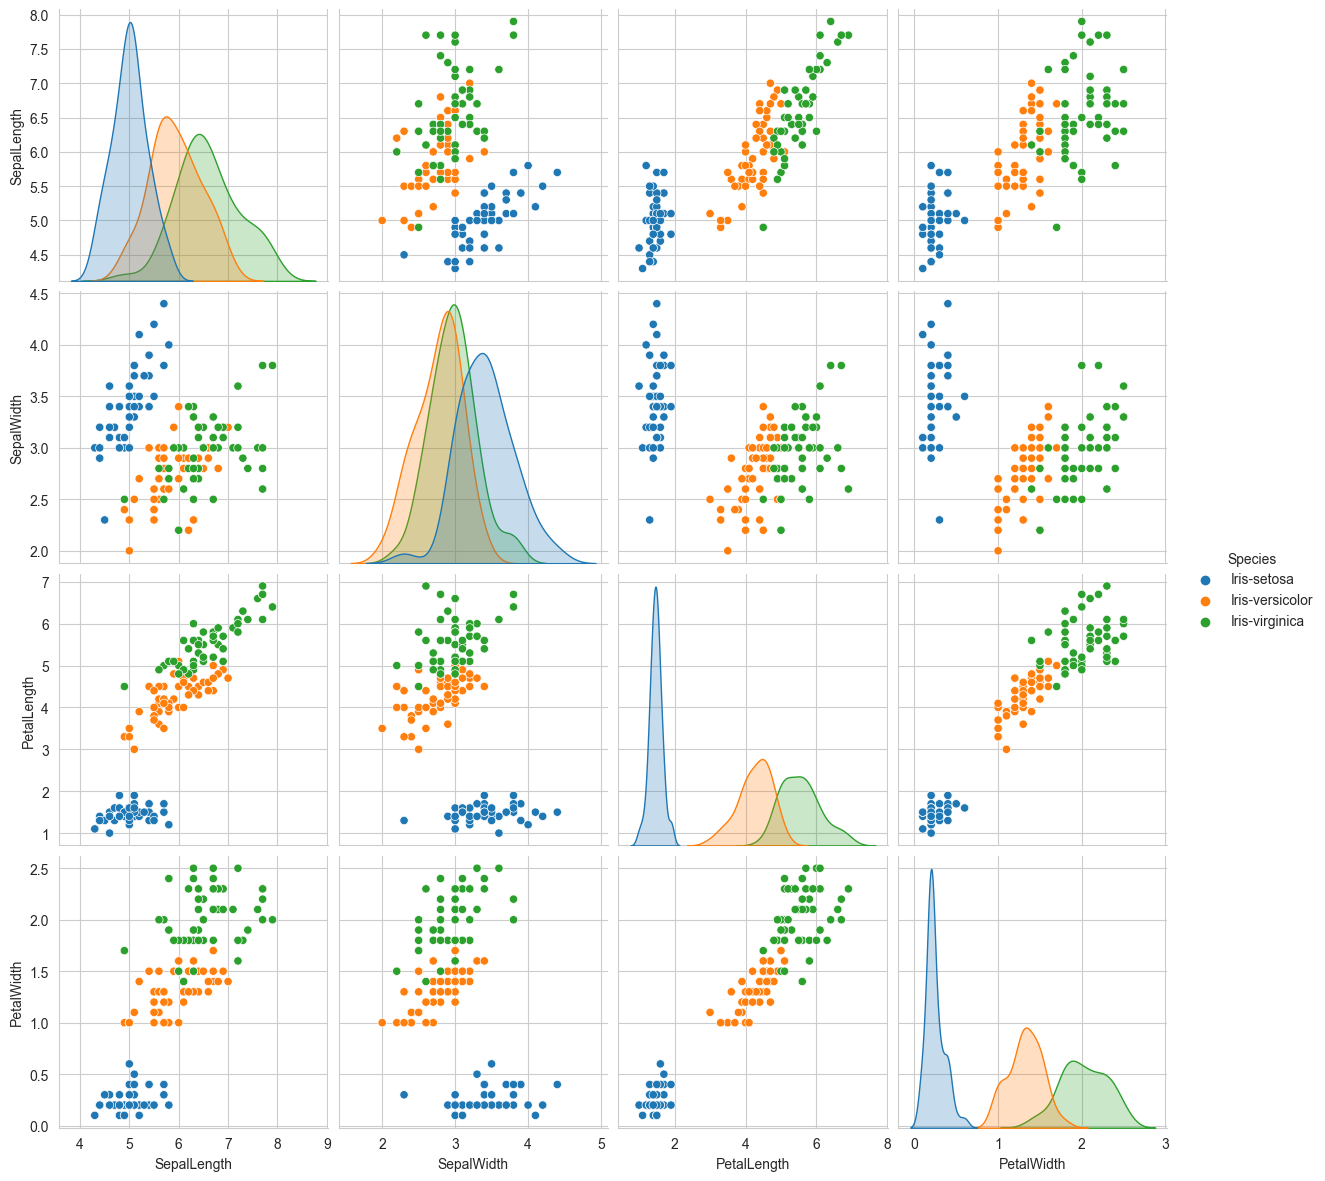

In [78]:
sns.set_style('whitegrid')
sns.pairplot(iris_df,hue='Species',size=3) # hue is variable
plt.show()

#### Observation
* All type of flowers are well seperable forSepalLength and PetalWidth

* Also all type of bit of well seperable for PetalWidth and SepalWidth

# Heatmap

<AxesSubplot: >

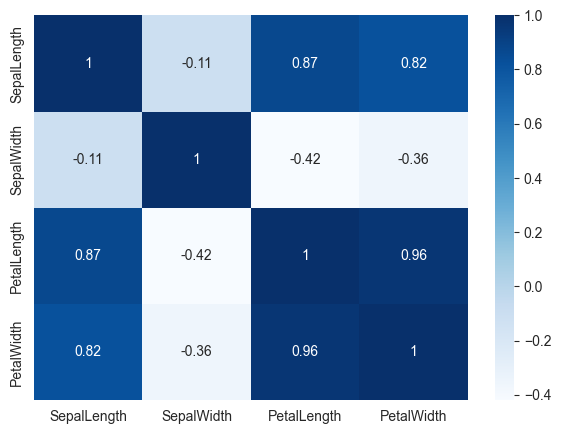

In [79]:
# Heatmap can give correlation between different features
fig=plt.figure(figsize=(7,5))
sns.heatmap(iris_df.corr(),cmap="Blues",annot=True)

#### OBSERVATION

* Correlation between PetalLength : PetalWidth = 0.96 ....Higest correlation
* Correlation between PetalLength : SepalLength = 0.87 ....Second Higest correlation
* Correlation between PetalWidth  : SepalLength = 0.96 ....Fair Enough correlation


# Displot

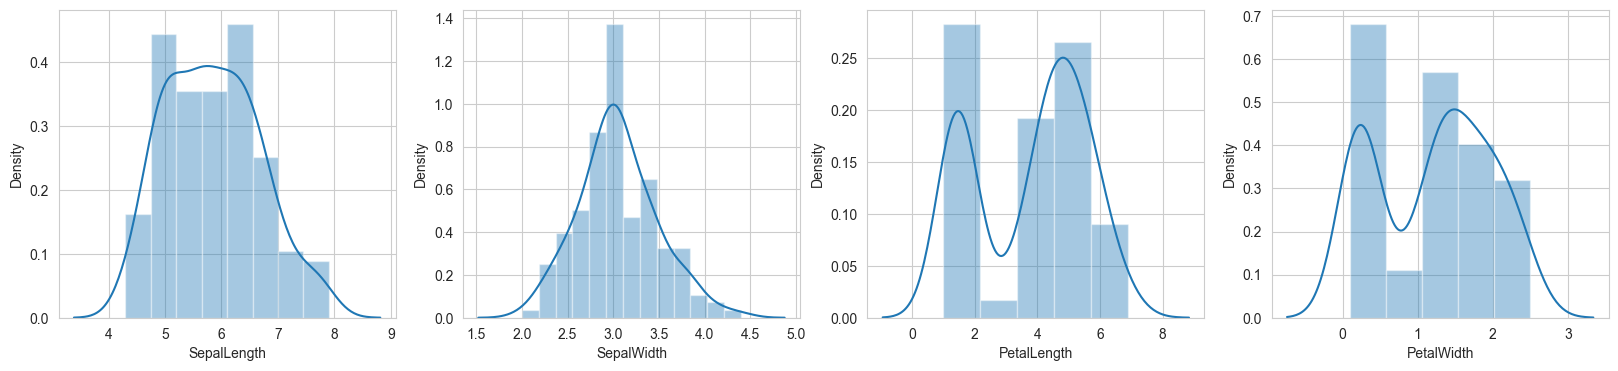

In [80]:
# Distribution Plot

columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
fig = plt.figure(figsize=(20,4))
i = 1

for col in columns:
    plt.subplot(1,4,i)
    sns.distplot(iris_df[col])
    i = i + 1    

plt.show()    


#### Observation

* SepalLength : maximum distribution is around 5 to 6
* Sepalwidtgh : maximum distribution is around 3
* PetalLength : maximum distribution is around 4.5
* Petalwidth  : maximum distribution is around 1.5

### Univariate anyalysis of features

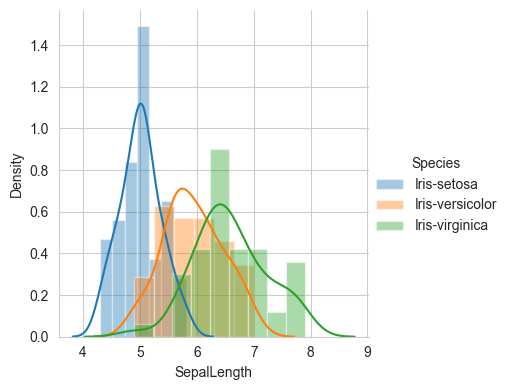

In [81]:
sns.FacetGrid(iris_df, hue='Species', height=4).map(sns.distplot, 'SepalLength').add_legend()

* We can not seperate flowers just using SepalLength 

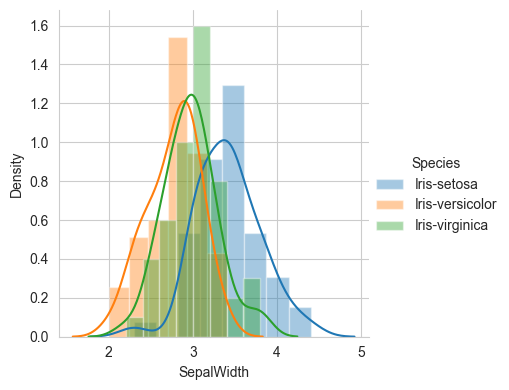

In [82]:
sns.FacetGrid(iris_df,hue='Species',height=4).map(sns.distplot,'SepalWidth').add_legend()

* We can not seperate flowers just using SepalWidth 

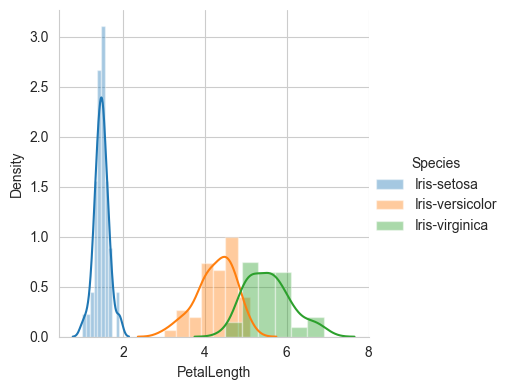

In [83]:
sns.FacetGrid(iris_df,hue='Species',height=4).map(sns.distplot,'PetalLength').add_legend()

* Using PetalLength we seperated the Iris-Setosa
* Also we Partially seperated Iris-versicolor and Iris-vrginica

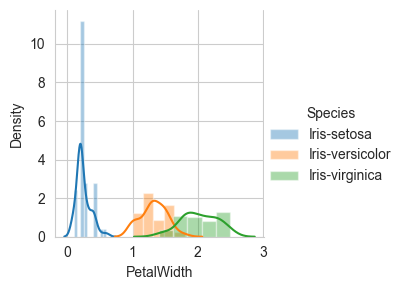

In [84]:
sns.FacetGrid(iris_df,hue='Species').map(sns.distplot,'PetalWidth').add_legend()

* Using PetalWidth we seperated Iris-Setosa
* And also Partially seperated Iris-versicolor and Iris-verginica

### Box-Plot

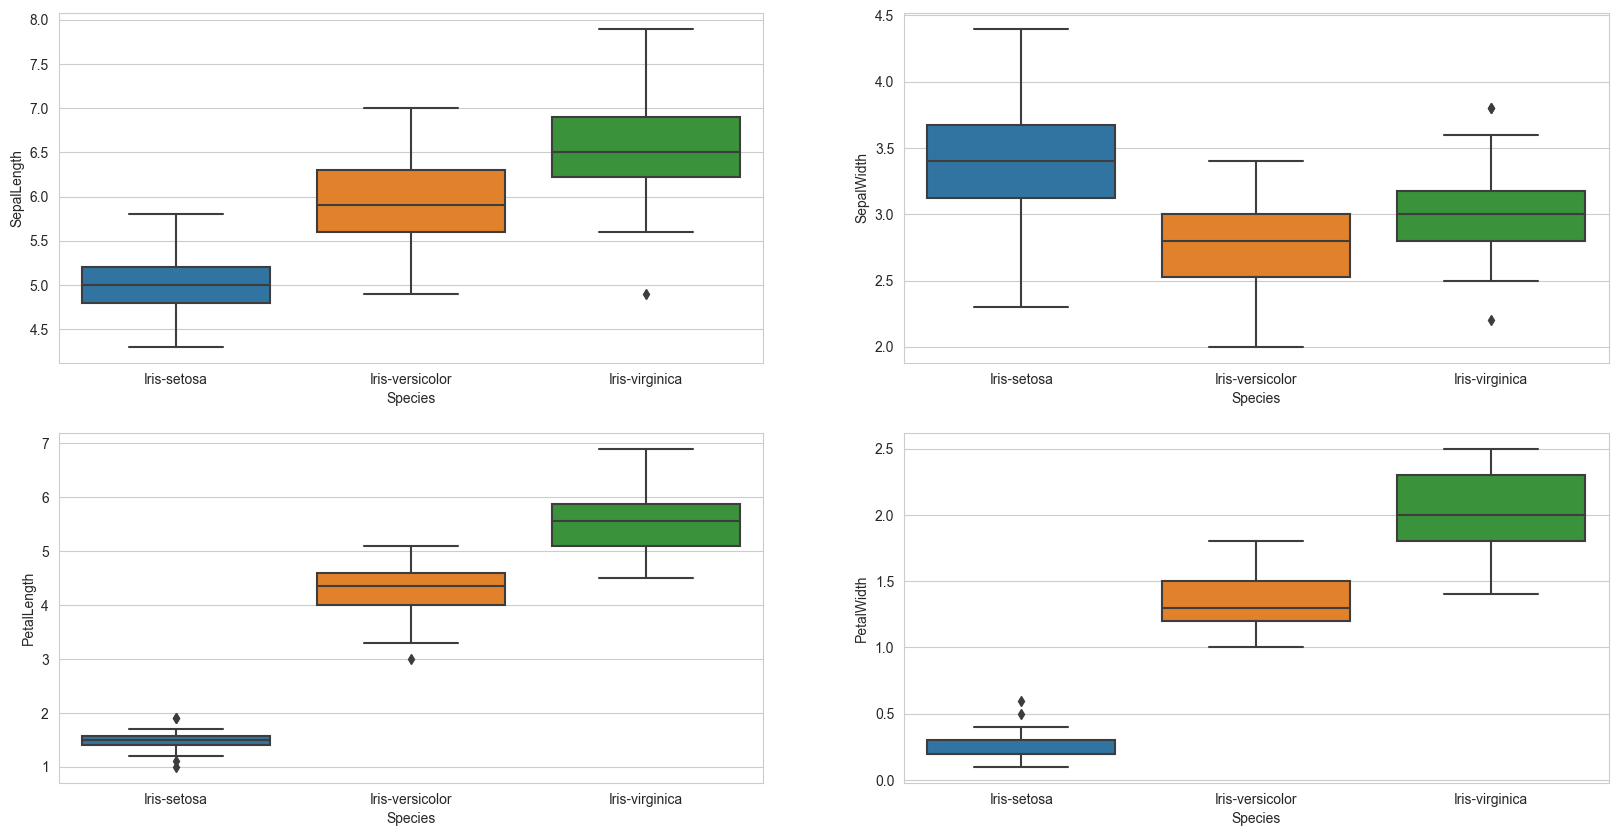

In [85]:
fig , axis = plt.subplots(2 , 2 ,figsize=(20,10))

sns.boxplot( x = 'Species', y = 'SepalLength' , data =iris_df , ax = axis[ 0 , 0])
sns.boxplot( x = 'Species', y = 'SepalWidth'  , data =iris_df , ax = axis[ 0 , 1])
sns.boxplot( x = 'Species', y = 'PetalLength' , data =iris_df , ax = axis[ 1 , 0])
sns.boxplot( x = 'Species', y = 'PetalWidth'  , data =iris_df , ax = axis[ 1 , 1])

plt.show()

* Iris-setosa : It's usually having smaller features except SepalWidth
* Iris-versicolor : It's having average features
* Iris-virginica : It's having bigger features except SepalWidth

### Violin Plot

<AxesSubplot: xlabel='Species', ylabel='PetalWidth'>

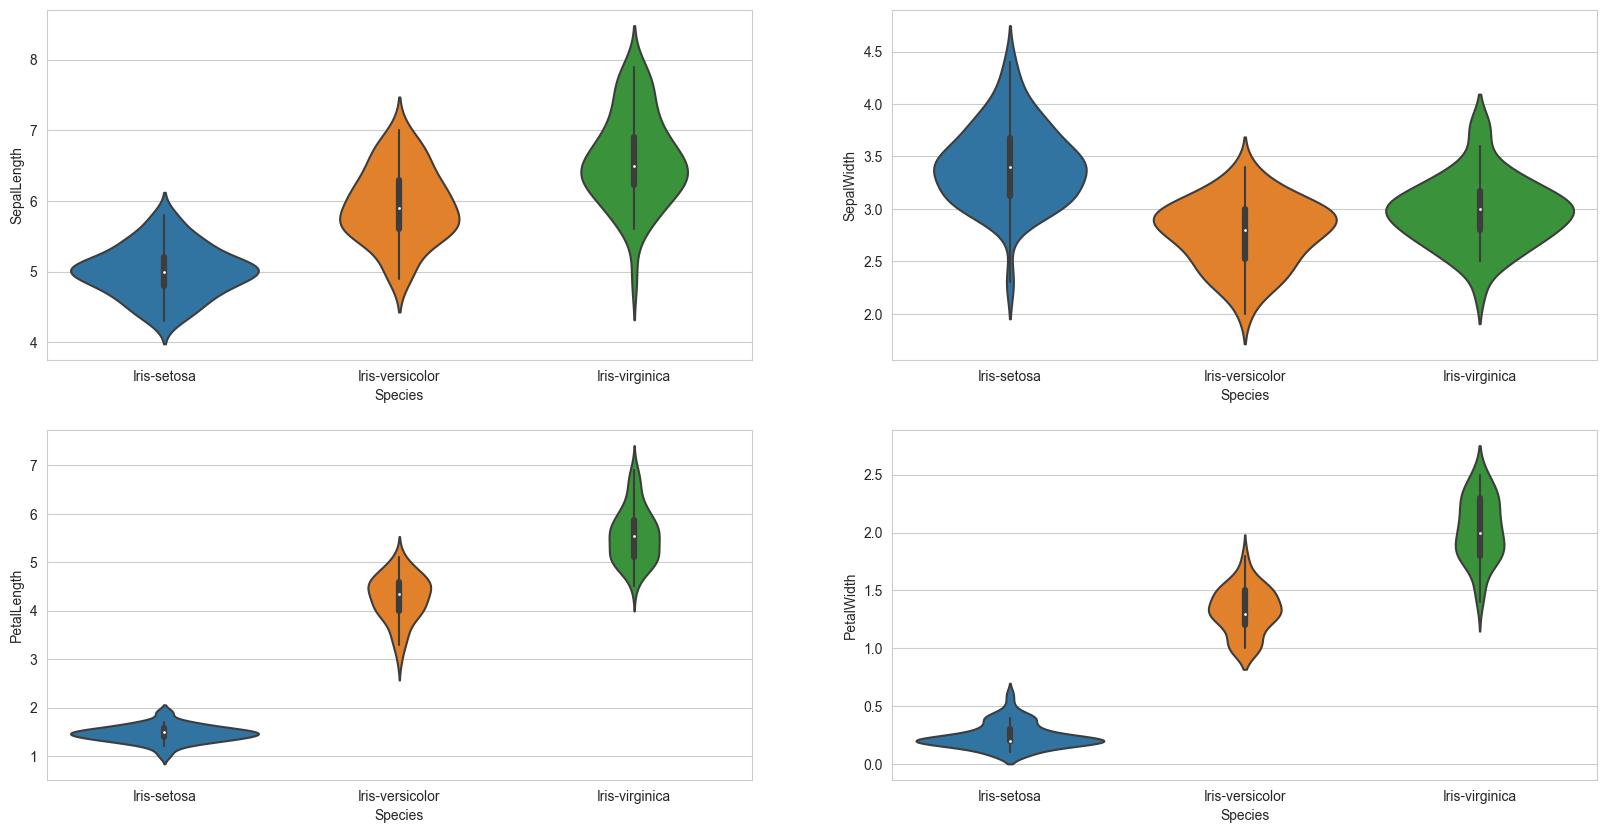

In [86]:
fig , axis = plt.subplots(2,2 ,figsize=(20,10))

sns.violinplot(x='Species',y="SepalLength",data=iris_df,ax=axis[0,0])
sns.violinplot(x='Species',y='SepalWidth',data=iris_df,ax=axis[0,1])
sns.violinplot(x='Species',y='PetalLength',data=iris_df,ax=axis[1,0])
sns.violinplot(x='Species',y='PetalWidth',data=iris_df,ax=axis[1,1])

# Conclusion

* Data is Balanced.
* Strong correlation between PetalLength and PetalWidth.
* Iris-setosa is easily seperable from other flowers , even using single feature.
* Iris-versicolor ans Iris-virginica are difficult to seperate even using single feature.